## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [12]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [13]:
train, test = keras.datasets.cifar10.load_data()

In [14]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [15]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
from keras.regularizers import l1, l2, l1_l2

"""Code Here
建立你的神經網路
"""

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_rario=0.0, l2_ratio=0.0):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_rario, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_rario, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
"""Code Here
設定超參數
"""

## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 10
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]


In [20]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for l1r, l2r in itertools.product(L1_EXP, L2_EXP):
    keras.backend.clear_session()
    print("Experiment with L1 = %.6f, L2 = %.6f" % (l1r, l2r))
    model = build_mlp(input_shape=x_train.shape[1:], l1_rario=l1r, l2_ratio=l2r)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=l1r, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s-l2-%s" % (str(l1r), str(l2r))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



Experiment with L1 = 0.010000, L2 = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/500

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 48us/step - loss: 198.6968 - acc: 0.2506 - val_loss: 41.1215 - val_acc: 0.2670
Epoch 2/10
50000/50000 [==============================] - 2s 43us/step - loss: 19.1147 - acc: 0.1197 - val_loss: 7.3066 - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 2s 43us/step - loss: 4.1270 - acc: 0.0992 - val_loss: 2.6560 - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 2s 43us/step - loss: 2.4878 - acc: 0.0992 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 2s 42us/step - loss: 2.4626 - acc: 0.0956 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 2s 43us/step - loss: 2.4626 - acc: 0.0991 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 7/10
50000/50000 [==============================] - 2s 42us/step - loss: 2.4626 - acc: 0.0989 - val_loss: 2.4626 - val

Epoch 6/10
50000/50000 [==============================] - 2s 42us/step - loss: 5.3596 - acc: 0.4397 - val_loss: 5.3209 - val_acc: 0.4403
Epoch 7/10
50000/50000 [==============================] - 2s 42us/step - loss: 5.2601 - acc: 0.4543 - val_loss: 5.2195 - val_acc: 0.4507
Epoch 8/10
50000/50000 [==============================] - 2s 42us/step - loss: 5.1649 - acc: 0.4618 - val_loss: 5.1287 - val_acc: 0.4591
Epoch 9/10
50000/50000 [==============================] - 2s 42us/step - loss: 5.0720 - acc: 0.4723 - val_loss: 5.0620 - val_acc: 0.4637
Epoch 10/10
50000/50000 [==============================] - 2s 42us/step - loss: 4.9838 - acc: 0.4787 - val_loss: 4.9609 - val_acc: 0.4727
Experiment with L1 = 0.000100, L2 = 0.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
______________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 48us/step - loss: 15.0706 - acc: 0.2711 - val_loss: 13.9404 - val_acc: 0.3469
Epoch 2/10
50000/50000 [==============================] - 2s 43us/step - loss: 13.0046 - acc: 0.3607 - val_loss: 12.1190 - val_acc: 0.3704
Epoch 3/10
50000/50000 [==============================] - 2s 43us/step - loss: 11.3342 - acc: 0.3803 - val_loss: 10.5815 - val_acc: 0.3932
Epoch 4/10
50000/50000 [==============================] - 2s 43us/step - loss: 9.9245 - acc: 0.3933 - val_loss: 9.2891 - val_acc: 0.4020
Epoch 5/10
50000/50000 [==============================] - 2s 43us/step - loss: 8.7237 - acc: 0.4039 - val_loss: 8.1851 - val_acc: 0.4143
Epoch 6/10
50000/50000 [==============================] - 2s 43us/step - loss: 7.7025 - acc: 0.4135 - val_loss: 7.2438 - val_acc: 0.4216
Epoch 7/10
50000/50000 [==============================] - 2s 43us/step - loss: 6.8315 - acc: 0.4197 - val_loss: 6.4410 - v

50000/50000 [==============================] - 2s 44us/step - loss: 1.5845 - acc: 0.4440 - val_loss: 1.5770 - val_acc: 0.4442
Epoch 7/10
50000/50000 [==============================] - 2s 44us/step - loss: 1.5506 - acc: 0.4574 - val_loss: 1.5604 - val_acc: 0.4455
Epoch 8/10
50000/50000 [==============================] - 2s 44us/step - loss: 1.5206 - acc: 0.4699 - val_loss: 1.5385 - val_acc: 0.4579
Epoch 9/10
50000/50000 [==============================] - 2s 44us/step - loss: 1.4944 - acc: 0.4758 - val_loss: 1.5116 - val_acc: 0.4684
Epoch 10/10
50000/50000 [==============================] - 2s 44us/step - loss: 1.4693 - acc: 0.4847 - val_loss: 1.4924 - val_acc: 0.4716
Experiment with L1 = 0.000000, L2 = 0.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 47us/step - loss: 2.0342 - acc: 0.2681 - val_loss: 1.8591 - val_acc: 0.3483
Epoch 2/10
50000/50000 [==============================] - 2s 43us/step - loss: 1.8013 - acc: 0.3700 - val_loss: 1.7481 - val_acc: 0.3903
Epoch 3/10
50000/50000 [==============================] - 2s 42us/step - loss: 1.7182 - acc: 0.3983 - val_loss: 1.6828 - val_acc: 0.4118
Epoch 4/10
50000/50000 [==============================] - 2s 43us/step - loss: 1.6620 - acc: 0.4170 - val_loss: 1.6356 - val_acc: 0.4281
Epoch 5/10
50000/50000 [==============================] - 2s 42us/step - loss: 1.6157 - acc: 0.4335 - val_loss: 1.6052 - val_acc: 0.4329
Epoch 6/10
50000/50000 [==============================] - 2s 43us/step - loss: 1.5760 - acc: 0.4490 - val_loss: 1.5722 - val_acc: 0.4422
Epoch 7/10
50000/50000 [==============================] - 2s 42us/step - loss: 1.5425 - acc: 0.4594 - val_loss: 1.5420 - val_acc

50000/50000 [==============================] - 2s 37us/step - loss: 7.7214 - acc: 0.4060 - val_loss: 7.2540 - val_acc: 0.4090
Epoch 7/10
50000/50000 [==============================] - 2s 37us/step - loss: 6.8443 - acc: 0.4142 - val_loss: 6.4501 - val_acc: 0.4163
Epoch 8/10
50000/50000 [==============================] - 2s 38us/step - loss: 6.1001 - acc: 0.4198 - val_loss: 5.7605 - val_acc: 0.4286
Epoch 9/10
50000/50000 [==============================] - 2s 37us/step - loss: 5.4664 - acc: 0.4264 - val_loss: 5.1738 - val_acc: 0.4320
Epoch 10/10
50000/50000 [==============================] - 2s 37us/step - loss: 4.9239 - acc: 0.4290 - val_loss: 4.6790 - val_acc: 0.4360
Experiment with L1 = 0.000000, L2 = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 37us/step - loss: 2.0399 - acc: 0.2590 - val_loss: 1.8908 - val_acc: 0.3260
Epoch 2/10
50000/50000 [==============================] - 2s 35us/step - loss: 1.8283 - acc: 0.3516 - val_loss: 1.7691 - val_acc: 0.3741
Epoch 3/10
50000/50000 [==============================] - 2s 35us/step - loss: 1.7410 - acc: 0.3857 - val_loss: 1.7256 - val_acc: 0.3892
Epoch 4/10
50000/50000 [==============================] - 2s 35us/step - loss: 1.6876 - acc: 0.4027 - val_loss: 1.6635 - val_acc: 0.4154
Epoch 5/10
50000/50000 [==============================] - 2s 35us/step - loss: 1.6382 - acc: 0.4216 - val_loss: 1.6202 - val_acc: 0.4302
Epoch 6/10
50000/50000 [==============================] - 2s 35us/step - loss: 1.6091 - acc: 0.4304 - val_loss: 1.5980 - val_acc: 0.4377
Epoch 7/10
50000/50000 [==============================] - 2s 35us/step - loss: 1.5700 - acc: 0.4451 - val_loss: 1.5629 - val_acc

color_bar : [(1.0, 0.0, 0.16, 1.0), (1.0, 0.04981452040275571, 0.0, 1.0), (1.0, 0.2829888712241654, 0.0, 1.0), (1.0, 0.5161632220455751, 0.0, 1.0), (1.0, 0.7281399046104929, 0.0, 1.0), (1.0, 0.9613142554319024, 0.0, 1.0), (0.8055113937466878, 1.0, 0.0, 1.0), (0.5935347111817703, 1.0, 0.0, 1.0), (0.36036036036036034, 1.0, 0.0, 1.0), (0.12718600953895065, 1.0, 0.0, 1.0), (0.0, 1.0, 0.08433480919249393, 1.0), (0.0, 1.0, 0.3162555344718534, 1.0), (0.0, 1.0, 0.5481762597512125, 1.0), (0.0, 1.0, 0.7590132827324482, 1.0), (0.0, 1.0, 0.9909340080118073, 1.0), (0.0, 0.774722932651321, 1.0, 1.0), (0.0, 0.5615942028985503, 1.0, 1.0), (0.0, 0.32715260017050274, 1.0, 1.0), (0.0, 0.09271099744245515, 1.0, 1.0), (0.12041773231031558, 0.0, 1.0, 1.0), (0.35485933503836337, 0.0, 1.0, 1.0), (0.5893009377664112, 0.0, 1.0, 1.0), (0.8024296675191819, 0.0, 1.0, 1.0), (1.0, 0.0, 0.9631287297527703, 1.0), (1.0, 0.0, 0.75, 1.0)]


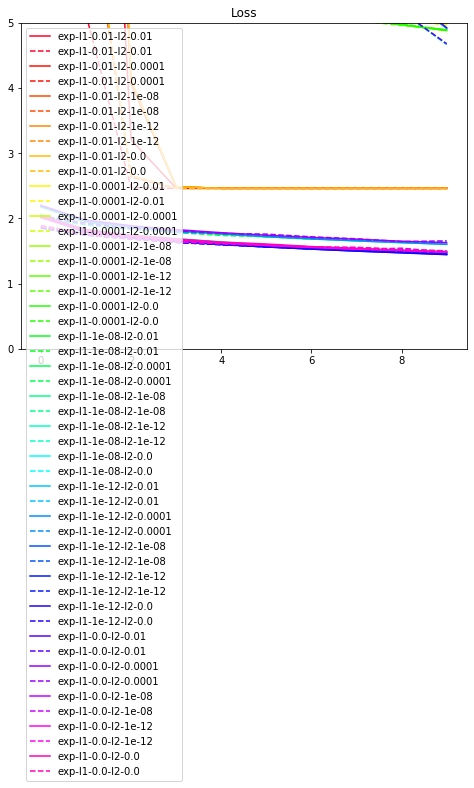

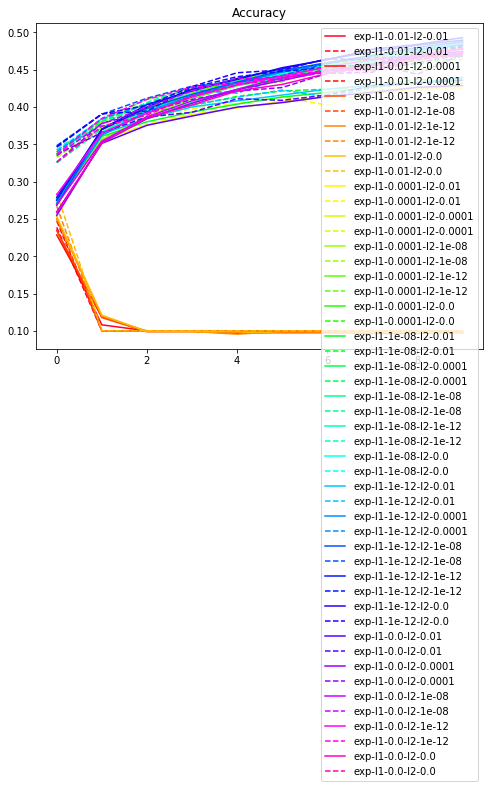

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 25

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]
print("color_bar :", color_bar)

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()